In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv(r"C:\Users\Yamin Hossain\Downloads\zomato.csv")
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56247,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
56248,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars
56249,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars
56250,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [80]:
# Convert the "name" column to a string and apply encoding and decoding
df['name'] = df['name'].astype(str).apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

# Drop any rows with null values in the "name" column
df = df.dropna(subset=['name'])

In [81]:
# Convert all string columns to a string and apply encoding and decoding
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

# Drop any rows with null values in the dataset
df = df.dropna()

In [82]:
# Check for missing values in each column
print(df.isnull().sum())

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


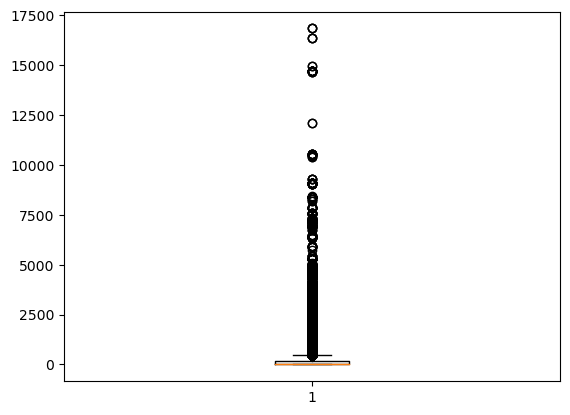

In [83]:
# Convert the "Votes" column to a numeric data type
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Drop any rows with NaN values in the "Votes" column
df = df.dropna(subset=['votes'])

# Create a box plot of the "Votes" column
plt.boxplot(df['votes'])
plt.show()


In [84]:
# Extract the numerical rating from the "rate" column
df['rate'] = df['rate'].str.split('/', n=1, expand=True)[0]

In [85]:
# Convert the "rate" column to a numeric data type
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [86]:
# Replace any values in the "Rate" column that are greater than 5 with 5
df.loc[df['rate'] > 5, 'rate'] = 5

# Replace any values in the "Rate" column that are less than 0 with 0
df.loc[df['rate'] < 0, 'rate'] = 0

In [87]:
# Remove commas from the "approx_cost(for two people)" column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '')

# Convert the "approx_cost(for two people)" column to a float data type
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

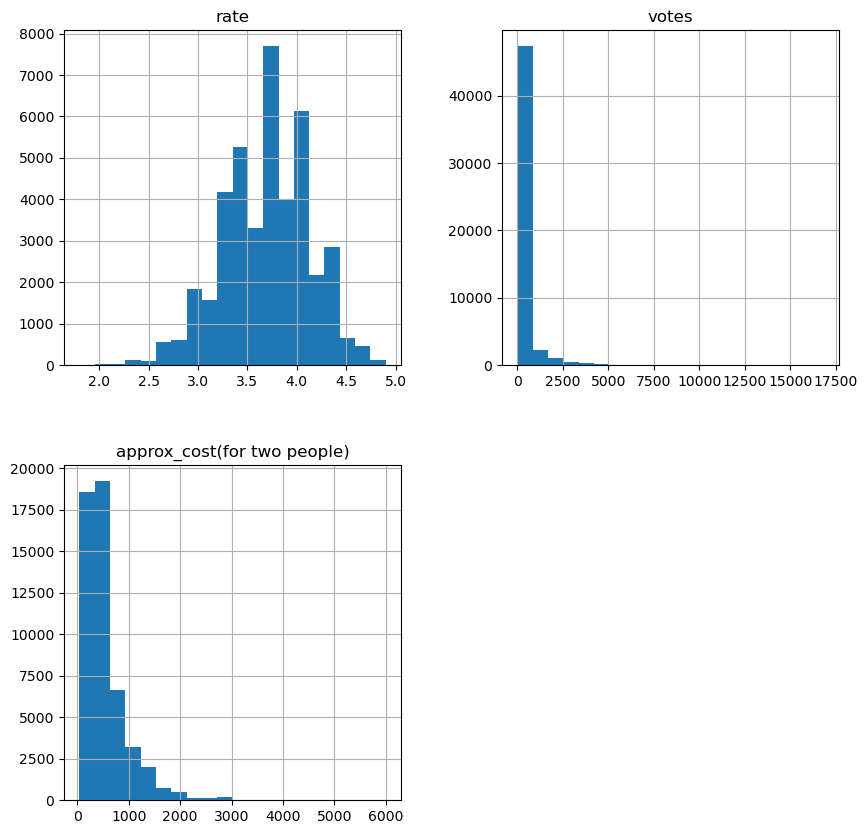

In [88]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [89]:
df = df.rename(columns={'approx_cost(for two people)': 'cost_for_two'})

In [90]:
# Rename the index to 'id' and rename the 'rate' column to 'rating'
df = df.rename_axis('id').rename(columns={'rate': 'rating','listed_in(type)':'type'})

# Define the columns to keep
keep_cols = ['name', 'online_order', 'book_table', 'rating', 'votes', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost_for_two', 'type']

# Drop the unwanted columns
df = df[keep_cols]

In [91]:
# Delete null values in the "name" column
df = df.dropna(subset=["name"])

# Replace null values in the "online_order" column with "NA"
df["online_order"].fillna("NA", inplace=True)

# Replace null values in the "book_table" column with "NA"
df["book_table"].fillna("NA", inplace=True)

# Replace null values in the "rating" column with 0
df["rating"].fillna(0, inplace=True)

# Replace null values in the "votes" column with 0
df["votes"].fillna(0, inplace=True)

# Replace null values in the "location" column with "NA"
df["location"].fillna("NA", inplace=True)

# Replace null values in the "rest_type" column with "NA"
df["rest_type"].fillna("NA", inplace=True)

# Replace null values in the "dish_liked" column with "NA"
df["dish_liked"].fillna("NA", inplace=True)

# Replace null values in the "cuisines" column with "NA"
df["cuisines"].fillna("NA", inplace=True)

# Replace null values in the "approx_cost(for two people)" column with 0
df["cost_for_two"].fillna(0, inplace=True)

# Replace null values in the "type" column with "NA"
df["type"].fillna("NA", inplace=True)

In [92]:
df.duplicated().sum()

20436

In [93]:
df.drop_duplicates(inplace=True)

In [94]:
df.to_csv('cleaned_dataset.csv', index=False)